# Определение перспективного тарифа для телеком компании

В компании «Мегалайн» (федеральный оператора сотовой связи) клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
***Главная задача проекта*** - оценить и сравнить прибыльность каждого тарифа для компании, на основе анализа поведения клиентов. Полученные выводы будут учтены при дальнейшем формировании рекламного бюджета. Сравнение условий тарифов представлены в таблице ниже.

| Условия | Тариф "Смарт" | Тариф "Ультра" |
| :- | :-: | :-: |
|Ежемесячная плата, руб | 550 | 1950
|Количество минут | 500 | 3000
|Количество SMS | 50 | 1000
|Объем интернет-трафика, Гб | 15| 30
|| **Стоимость услуг сверх тарифного пакета, руб** ||
|1 минутa | 3 | 1
|1 SMS | 3 | 1
|1 Гб | 200| 150
  

## Содержание

 1. [Изучение данных](#step2)  
 2. [Предобработка данных](#step3)    
 3. [Анализ данных](#step4)
 4. [Проверка гипотез](#step5)  
 5. [Общие выводы](#step6)


<a id="step2"></a> 
## Изучение данных

Для начала рассмотрим таблицу с клиентами.

In [1]:
import pandas as pd
users=pd.read_csv('/datasets/users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [2]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Выборка включает в себя базу данных по 500 клиентам, каждому из которых присвоен свой уникальный id. Мы видим большое число пропущенных значений по дате прекращения пользования тарифом. Согласно представленному описанию данных, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Таким образом, только 38 из 500 клиентов приняли решение отключить используемый тариф. Также мы видим, что необходимо сменить типа данных даты отключения тарифа и даты регистрации клиента. 

Проверим наличие дубликатов в выборке.

In [3]:
users.duplicated().sum()

0

Дублирующих строк нет.

Проверим наличие дубликатов в категориальной переменной по городам, просмотрев не повторяются ли значения из-за разных регистров.

In [4]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Дублирующие значения отсутствуют.

Далее рассмотрим таблицу по звонкам.

In [5]:
calls=pd.read_csv('/datasets/calls.csv')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls['user_id'].nunique()

492

При первоначальном изучении данных по звонкам, мы видим, что:  
* необходимо заменить тип данных по переменной даты звонка на формат даты
* учитывая, что оператор всегда округляет вверх значения минут, длительность звонка можно округлить и заменить на целочисленные значения
* по 8 клиентам из выборки отсутствуют данные о совершенных звонках, возможно они не пользовались мобильной связью, а предпочитали совершать звонки через мессенджеры. Данный факт следует учесть при последующем объединении таблиц - включить в итоговую таблицу все 500 клиентов, пропущенные значения по звонкам - заменить на 0.

In [8]:
len(calls.query('duration==0.00'))/len(calls)

0.19551644316336553

Около 20% значений длительности звонка равна нулю, что скорее всего может отражать пропущенные звонки. Удалять данные значения было бы некорректно, так как они составляют значительный процент выборки. Также заменять данные нулевые значения тоже не стоит, потому что при дальнейшем анализе это исказит значение прибыли, которую получает оператор от клиента. Более того, наличие пропущенных звонков отражает нашу реальную действительность, удаление нулевых значений может привести к искажению анализа поведения клиента. Таким образом, оставим нулевую продолжительность звонков в том виде, в котором она была представлена изначально.

Изучим наличие выбросов по переменной длительности звонков, построив диаграмму рассеяния.

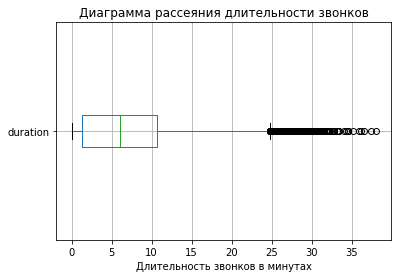

In [9]:
import matplotlib.pyplot as plt
calls.boxplot(column='duration', vert=False)
plt.title('Диаграмма рассеяния длительности звонков')
plt.xlabel('Длительность звонков в минутах')
plt.show()

На диаграмме рассеяния мы видим достаточно плотный хвост выбросов, однако если посмотреть на значения данных выбросов, то ими являются  все звонки продолжителньостью примерно от 25 до 40 минут, что является весьма допустимыми значениями в нашей жизни. Для более детального изучения рассмотрим описательную статистику.

In [10]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Мы видим что половина звонков нашей выборки длится не более 6 минут, и только четверть звонков длится больше 10.7 минут. Звонок с максимальной продолжительностью составляет 38 минут, что вполне может соответствовать действительности. Также отметим, что медиана и среднее значение не значительно отличаются друг от друга, а значит можно предположить, что выбросы, наблюдаемые на диаграмме рассеяния не искажают представления о длительности звоноков. Вместе с тем стоит отметить, что стандартное отклонение принимает достаточно большое значение. Данный факт свидетельствует о том, что в выборке наблюдается высокий разброс данных, который может объсняться наличием пропущенных звоноков с нулевой длительностью, а также наоборот слишком продолжительных звонков, которые определяются как выбросы на диаграмме рассеяния. 

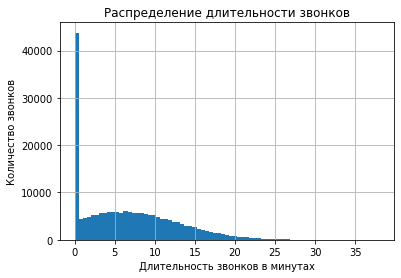

In [11]:
calls['duration'].hist(bins=75)
plt.title('Распределение длительности звонков')
plt.xlabel('Длительность звонков в минутах')
plt.ylabel('Количество звонков')
plt.show()


По графику распределения мы видим, что рассматриваемый датасет имеет скошенность вправо: среднее значение длительности звонков больше медианы, что мы могли заметить ранее и из описательной статистики и на боксплоте.

Проверим наличие дубликатов в таблице со звонками.

In [12]:
calls.duplicated().sum()

0

Дублирующие строки отсутствуют.

Далее рассмотрим данные по используемому трафику интернета.

In [13]:
net=pd.read_csv('/datasets/internet.csv')
net

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Мы видим в таблице столбец который просто дублирует нумерацию строк - от него можно избавиться.

In [14]:
del net['Unnamed: 0']

In [15]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [16]:
net['user_id'].nunique()

497

При первоначальном изучении данных по использованию интернет-трафика, мы видим, что:  
* необходимо заменить тип данных по переменной даты сессии на формат даты
* учитывая, что оператор всегда округляет вверх значения мегабайт, количество использованных Мб можно округлить вверх и заменить на целочисленные значения
* по 3 клиентам из выборки отсутствуют данные  - возможно, мобильный интернет им неудобен в использовании и они не пользуются трафиком. Данный факт следует учесть при последующем объединении таблиц - включить в итоговую таблицу все 500 клиентов, пропущенные значения по трафику - заменить на 0.

In [17]:
net['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

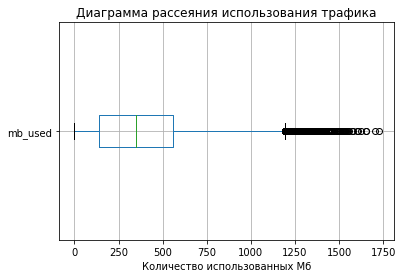

In [18]:
import matplotlib.pyplot as plt
net.boxplot(column='mb_used', vert=False)
plt.title('Диаграмма рассеяния использования трафика')
plt.xlabel('Количество использованных Мб')
plt.show()

In [19]:
len(net.query('mb_used==0'))/len(net)

0.13118155773916304

Минимальное значение сессии - 0 мб, можно предположить, что это прерванные интернет-сессии, в результате которых не были загружены страницы. Подобные сессии составляют около 13% от всех наблюдений. На диаграмме рассеяния мы видим достаточно плотный хвост выбросов, однако если посмотреть на значения данных выбросов, то ими являются  все сессии, которые затрачивают примерно от 1200 до 1724 Мб, возможно в данном случае клиенты тратили мобильный трафик на длительный просмотр видео. При этом половина всех сессий затрачивала не более 348 Мб. При этом мы наблюдаем достаточно высокое стандартное отклонение размером около 278Мб. Также учитывая, что медианное значение ниже среднего, можно говорить о том, что распределение интернет-сессий скошено вправо. Проверим это на гистограмме ниже.

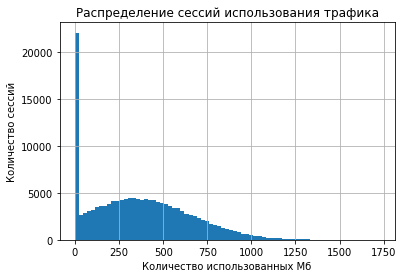

In [20]:
net['mb_used'].hist(bins=75)
plt.title('Распределение сессий использования трафика')
plt.xlabel('Количество использованных Мб')
plt.ylabel('Количество сессий')
plt.show()

In [21]:
sms=pd.read_csv('/datasets/messages.csv')
sms

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [22]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [23]:
sms['user_id'].nunique()

426

При первоначальном изучении данных по отправке смс, мы видим, что:  
* необходимо заменить тип данных по переменной даты отправки смс на формат даты
* по 74 клиентам из выборки отсутствуют данные  - скорее всего, они не отправляют смс соббщения, а предпочитают общение исключительно в мессенджерах или же только через звонки. Данный факт следует учесть при последующем объединении таблиц - включить в итоговую таблицу все 500 клиентов, пропущенные значения по отправленным смс - заменить на 0.

Далее изучим таблицу по условиям тарифов.

In [24]:
tariff=pd.read_csv('/datasets/tariffs.csv')
tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В условиях тарифов мы видим, что изначально включенный пакет по интернет - трафику рассчитывается в мегабайтах. В случае исчерпания лимита трафика, далее уже указывается цена за 1 гигабайт. Следовательно, клиент не может далее докупать мегабайты, а должен сразу оплачивать 1 гигабайт интернета. Данную особенность необходимо учесть при расчете выручки с клиентов.

### Вывод

В результате первичного изучения данных мы определили следующие необходимые шаги для дальнейшей предобработки данных:
* приведение дат в таблицах клиентов, звоноков, смс и интернет-трафика к соответсвующему типу данных
* округление вверх использованных мегабайтов и длительности звонков и последующему приведению к целочисленному типу
* соединять таблицы на основе выборки из 500 клиентов, а полученные пропущенные значения по звонкам, смс и интернет-трафику заменить на ноль
* при расчете выручки с клиентов, учитывать, что в случае исчерпания лимита по трафику, далее цена взымается сразу за 1 Гб


<a id="step3"></a> 
## Предобработка данных 

Приведем все даты в таблицах к соответствующему типу данных

In [25]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y/%m/%d')
net['session_date'] = pd.to_datetime(net['session_date'],format='%Y/%m/%d')
sms['message_date'] = pd.to_datetime(sms['message_date'],format='%Y/%m/%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y/%m/%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y/%m/%d')

Округлим значения длительности звонков и трафика сессий и приведем к целочисленному типу

In [26]:
import numpy as np
calls['duration']=calls['duration'].apply(np.ceil).astype('int64')
net['mb_used']=net['mb_used'].apply(np.ceil).astype('int64')

Для сведения таблиц создадим отдельную таблицу, где сохраним все id клиентов и их дату регистрации

In [27]:
user = users.groupby(['user_id'])['reg_date'].min().reset_index()
user.head()


,user_id,reg_date
0,1000,2018-05-25
1,1001,2018-11-01
2,1002,2018-06-17
3,1003,2018-08-17
4,1004,2018-05-14


Из даты регистрации выделим отдельно месяц.

In [28]:
user['reg_month'] = user['reg_date'].values.astype('datetime64[M]')

Далее рассчитаем все месяцы регистрации представленные в выборке

In [29]:
min_month = users['reg_date'].values.astype('datetime64[M]').min()
max_month = users['reg_date'].values.astype('datetime64[M]').max()
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [30]:
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']


Соединим две таблицы.

In [31]:
dr['key'] = 1
user['key'] = 1
report = dr.merge(user,on='key')
len(report)
report['reg_month']=report['reg_date'].values.astype('datetime64[M]')
report

,month,key,user_id,reg_date,reg_month
0,2018-01-01,1,1000,2018-05-25,2018-05-01
1,2018-01-01,1,1001,2018-11-01,2018-11-01
2,2018-01-01,1,1002,2018-06-17,2018-06-01
3,2018-01-01,1,1003,2018-08-17,2018-08-01
4,2018-01-01,1,1004,2018-05-14,2018-05-01
...,...,...,...,...,...
5995,2018-12-01,1,1495,2018-08-28,2018-08-01
5996,2018-12-01,1,1496,2018-01-27,2018-01-01
5997,2018-12-01,1,1497,2018-10-09,2018-10-01
5998,2018-12-01,1,1498,2018-07-19,2018-07-01


Видим что у нас есть строки с месяцами, когда пользователь еще не был зарегистрирован.

In [32]:
len(report[report['month']>=report['reg_month']])

3259

Оставим только корректные строки, которые показывают месяцы для пользователя начиная с месяца его регистрации и далее.

In [33]:
report = report[report['month']>=report['reg_month']]


В таблицах с трафиком, звонками и смс создадим отдельную колонку с месяцами данных событий.

In [34]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
net['month'] = net['session_date'].values.astype('datetime64[M]')
sms['month'] = sms['message_date'].values.astype('datetime64[M]')


Перед тем как свести все данные в одну общую таблицу рассчитаем показатели для каждого клиента, которые будут в неё включены, а именно:
* количество звонков в каждом месяце и суммарное количество израсходованных минут
* количество отправленных сообщений по месяцам
* объем израсходованного интернет-трафика по месяцам

In [35]:
#количество звонков в каждом месяце и суммарное количество израсходованных минут
calls_amount=calls.groupby(['user_id','month'])[['duration']].agg(['count', 'sum']).reset_index()
calls_amount.columns=['user_id','month','amount_calls', 'total_dur']


In [36]:
#количество отправленных сообщений по месяцам
sms_amount=sms.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
sms_amount.columns=['user_id','month','sms']

In [37]:
#объем израсходованного интернет-трафика по месяцам;
net_amount=net.groupby(['user_id','month'])[['mb_used']].agg(['sum']).reset_index()
net_amount.columns=['user_id','month','mb_used']

Из полученных сводных таблиц составим общую, где по каждому клиенту будет отражена информация по звонкам, смс и трафику в каждом месяце.

In [38]:
report1 = report.merge(calls_amount,how='left',on=['user_id','month'])
report2 = report1.merge(sms_amount,how='left',on=['user_id','month'])
report3 = report2.merge(net_amount,how='left',on=['user_id','month'])
report3.head()

,month,key,user_id,reg_date,reg_month,amount_calls,total_dur,sms,mb_used
0,2018-01-01,1,1005,2018-01-25,2018-01-01,15.0,95.0,7.0,2730.0
1,2018-01-01,1,1032,2018-01-04,2018-01-01,61.0,380.0,38.0,24147.0
2,2018-01-01,1,1045,2018-01-30,2018-01-01,1.0,9.0,5.0,2348.0
3,2018-01-01,1,1055,2018-01-02,2018-01-01,64.0,551.0,30.0,17111.0
4,2018-01-01,1,1071,2018-01-09,2018-01-01,24.0,194.0,16.0,15622.0


В данной таблице нам еще не хватает ряда характеристик клиентов, а также условий их тарифов.

In [39]:
user_table=users[['user_id','tariff','city','age']]

In [40]:
tariff.rename(columns={'tariff_name': 'tariff'},inplace=True)
us_table=user_table.merge(tariff,how='left',on=['tariff'])

In [41]:
us_table

,user_id,tariff,city,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1
1,1001,smart,Москва,41,50,15360,500,550,200,3,3
2,1002,smart,Стерлитамак,59,50,15360,500,550,200,3,3
3,1003,ultra,Москва,23,1000,30720,3000,1950,150,1,1
4,1004,ultra,Новокузнецк,68,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,65,1000,30720,3000,1950,150,1,1
496,1496,smart,Вологда,36,50,15360,500,550,200,3,3
497,1497,smart,Челябинск,32,50,15360,500,550,200,3,3
498,1498,smart,Владикавказ,68,50,15360,500,550,200,3,3


Присоединим к таблице с показателями по клиентам, основные характеристики клиентов и условия их тарифов.

In [42]:
df=report3.merge(us_table, how='left', on='user_id')

In [43]:
df

,month,key,user_id,reg_date,reg_month,amount_calls,total_dur,sms,mb_used,tariff,city,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,2018-01-01,1,1005,2018-01-25,2018-01-01,15.0,95.0,7.0,2730.0,smart,Набережные Челны,67,50,15360,500,550,200,3,3
1,2018-01-01,1,1032,2018-01-04,2018-01-01,61.0,380.0,38.0,24147.0,smart,Ульяновск,31,50,15360,500,550,200,3,3
2,2018-01-01,1,1045,2018-01-30,2018-01-01,1.0,9.0,5.0,2348.0,smart,Улан-Удэ,48,50,15360,500,550,200,3,3
3,2018-01-01,1,1055,2018-01-02,2018-01-01,64.0,551.0,30.0,17111.0,smart,Казань,39,50,15360,500,550,200,3,3
4,2018-01-01,1,1071,2018-01-09,2018-01-01,24.0,194.0,16.0,15622.0,smart,Омск,20,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,2018-08-28,2018-08-01,155.0,1031.0,84.0,23450.0,ultra,Иркутск,65,1000,30720,3000,1950,150,1,1
3255,2018-12-01,1,1496,2018-01-27,2018-01-01,80.0,518.0,51.0,20757.0,smart,Вологда,36,50,15360,500,550,200,3,3
3256,2018-12-01,1,1497,2018-10-09,2018-10-01,71.0,545.0,17.0,19940.0,smart,Челябинск,32,50,15360,500,550,200,3,3
3257,2018-12-01,1,1498,2018-07-19,2018-07-01,NaN,NaN,NaN,NaN,smart,Владикавказ,68,50,15360,500,550,200,3,3


Проверим, что данные по всем клиентам присутствуют в итоговой таблице.

In [44]:
df['user_id'].nunique()

500

Изучим основную информацию по нашей итоговой таблице.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 19 columns):
month                    3259 non-null datetime64[ns]
key                      3259 non-null int64
user_id                  3259 non-null int64
reg_date                 3259 non-null datetime64[ns]
reg_month                3259 non-null datetime64[ns]
amount_calls             3174 non-null float64
total_dur                3174 non-null float64
sms                      2717 non-null float64
mb_used                  3203 non-null float64
tariff                   3259 non-null object
city                     3259 non-null object
age                      3259 non-null int64
messages_included        3259 non-null int64
mb_per_month_included    3259 non-null int64
minutes_included         3259 non-null int64
rub_monthly_fee          3259 non-null int64
rub_per_gb               3259 non-null int64
rub_per_message          3259 non-null int64
rub_per_minute           3259 non-null int64
d

Мы видим пропущенные значения по смс, звонкам и интернет-трафику, которые появились из-за того, что не все 500 клиентов пользовались каждой из этих услуг, поэтому заполним пропуски нолями.

In [46]:
df=df.fillna(0)

Также можно отметить, что после рассчетов ряда показателей, они приняли не целочисленный тип данных, что также стоит исправить.

In [47]:
df[['amount_calls','total_dur','mb_used','sms']]=df[['amount_calls','total_dur','mb_used','sms']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 19 columns):
month                    3259 non-null datetime64[ns]
key                      3259 non-null int64
user_id                  3259 non-null int64
reg_date                 3259 non-null datetime64[ns]
reg_month                3259 non-null datetime64[ns]
amount_calls             3259 non-null int64
total_dur                3259 non-null int64
sms                      3259 non-null int64
mb_used                  3259 non-null int64
tariff                   3259 non-null object
city                     3259 non-null object
age                      3259 non-null int64
messages_included        3259 non-null int64
mb_per_month_included    3259 non-null int64
minutes_included         3259 non-null int64
rub_monthly_fee          3259 non-null int64
rub_per_gb               3259 non-null int64
rub_per_message          3259 non-null int64
rub_per_minute           3259 non-null int64
dtypes: d

Далее имея все необходимые данные, рассчитаем выручку с каждого клиента.

In [48]:
#сначала учтем особенность исчерпания лимита трафика - если лимит закончился - пользователь платит сразу за Гб.
#создаддим пременную, которая отражает использование трафика сверх лимита, перевдя в Гб и округлив значения вверх до целых
df['gb_over']=((df['mb_used']-df['mb_per_month_included'])/1024).apply(np.ceil).astype('int64')

In [49]:
#прописываем функцию для расчета платы сверх тарифной стоимости, в случае исчерпания лимитов
def over_tariff(row):
    sms = (row['sms'] - row['messages_included']) * row['rub_per_message']
    calls = (row['total_dur'] - row['minutes_included']) * row['rub_per_minute']
    gb = row['gb_over']*row['rub_per_gb']
    total = 0
    for i in [sms, calls, gb]:
        if i > 0:
            total += i
    return total

df['over_tariff'] = df.apply(lambda x: over_tariff(x), axis=1)

#рассчитываем ежемесячную выручку с клиента
df['revenue']=df['over_tariff']+df['rub_monthly_fee'] 

### Вывод

На данном этапе мы заменили тип данных, где это это требовалось, произвели расчет необходимых метрик и свели все данные в одну таблицу, которая будет использована нами для дальнейшего анализа поведения клиентов тарифов "смарт" и "ультра".

<a id="step4"></a> 
## Анализ данных

Сделаем сводную таблицу, рассчитав сколько каждому клиенту требуется в среднем минут, смс и интернет трафика. А также определим среднюю выручку в месяц с каждого клиента.

In [50]:
dfg=df.pivot_table(index=['user_id','tariff'], values=['total_dur', 'sms', 'mb_used', 'revenue','over_tariff'], aggfunc='median')
dfg

,,mb_used,over_tariff,revenue,sms,total_dur
user_id,tariff,,,,,
1000,ultra,14325.5,0.0,1950.0,65.0,339.0
1001,smart,16252.5,400.0,950.0,0.0,422.0
1002,smart,17601.0,600.0,1150.0,11.0,214.0
1003,ultra,11368.0,0.0,1950.0,83.0,824.0
1004,ultra,17828.5,0.0,1950.0,154.5,132.5
...,...,...,...,...,...,...
1495,ultra,29393.0,0.0,1950.0,82.0,954.0
1496,smart,24067.5,1963.5,2513.5,41.5,524.0
1497,smart,14174.0,0.0,550.0,17.0,490.0


Создадим отдельные выборки по тарифам.

In [51]:
dfg_smart=dfg.query('tariff=="smart"')
dfg_ultra=dfg.query('tariff=="ultra"')


In [52]:
len(dfg_smart)

351

In [53]:
len(dfg_ultra)

149

В выборке с тарифом смарт клиентов больше более чем в 2 раза, чем в выборке с тарифом ультра.

In [54]:
len(dfg_smart.query('over_tariff>0'))/len(dfg_smart)

0.8461538461538461

In [55]:
len(dfg_ultra.query('over_tariff>0'))/len(dfg_ultra)

0.1476510067114094

Около 85% клиентов тарифа смарт выходит за лимиты пакета услуг и платит сверх ежемесячной платы, в то время как только 15% абонентов "ультра" не укладываются в ограничения тарифа.

Далее рассмотрим средние показатели по каждому тарифу, а также их стандартное отклонение и дисперсию.



In [56]:
dfg_st=dfg.pivot_table(index='tariff',values=['total_dur', 'sms', 'mb_used', 'revenue'],
                       aggfunc=['mean','median','var','std'])
dfg_st

mean                                       median          \
             mb_used      revenue        sms   total_dur  mb_used revenue   
tariff                                                                      
smart   16691.854701  1298.735043  33.310541  433.779202  16807.0  1150.0   
ultra   19766.765101  2048.154362  55.862416  547.124161  19105.0  1950.0   

                                 var                              \
         sms total_dur       mb_used        revenue          sms   
tariff                                                             
smart   28.0     436.5  1.917326e+07  529611.229597   774.013289   
ultra   47.0     532.5  8.008200e+07   77678.158444  2438.242767   

                              std                                     
           total_dur      mb_used     revenue        sms   total_dur  
tariff                                                                
smart   26932.791823  4378.728076  727.743931  27.821094  164.112132  
ultra   95948.992926  8948.854583  278.708016  49.378566  309.756344

**Количество минут**

В среднем пользователям тарифа смарт требуется около 437 минут в месяц, что составляет около 87% израсходования лимита, в то время как клиентам тарифа ультра необходимо около 533 минут - около 18% от лимита. При этом также стоит отметить, что стандартное отклонение по расходавнию минут у клиентов "ультра" почти в два раза выше, чем у клиентов "смарт". Это говорит о том, что разброс значений количества использованных минут выше в выборке у клиентов с тарифом "ультра", возможно, на это повлиял меньший размер выборки. Но основываясь на тех данных, которые имеются, мы можем говорить о том, что использование минут клиентами ультра менее предсказуемо.

**Количество СМС**


Клиенты тарифа смарт в среднем отправляют 28 сообщений в месяц, используя 56% от лимита. Клиенты тарифа ультра в среднем пишут 47 смс в месяц, расходуя  около 0,05% лимита. Стандартные отклонения по данной величине примерно равны средним значениям в каждой выборке по тарифу.

**Интернет-трафик**

В среднем пользователи тарифа смарт расходуют около 16807 Мб в месяц, превышая лимит примерно на 9%. Клиенты с тарифом "ультра" расходуют в среднем 19105 Мб в месяц, не выходя рамки лимита и расходуя его на 62%. При этом, исходя из значений стандартного отклонения, разброс значений по использованию трафика у клиентов тарифа ультра выше.



**Средняя выручка**

Средняя выручка с клиентов тарифа смарт составляет 1150 рублей, то есть клиент в среднем переплачивает в размере еще одной стоимости своего тарифа в месяц. Средняя выручка с клиента тарифа ультра составляет 1950 рублей, что непосредственно равняется ежемесячной плате по пакету предоставляемых услуг.

Расчет показателей с полными данными

In [57]:
df1=df.pivot_table(index='tariff',values=['total_dur', 'sms', 'mb_used', 'revenue'],
                       aggfunc=['mean','median','var','std'])
df1


mean                                       median              \
             mb_used      revenue        sms   total_dur  mb_used revenue sms   
tariff                                                                          
smart   16056.307590  1286.707057  33.028407  413.482912  16457.0    1013  28   
ultra   19080.117296  2068.538767  48.333002  515.630219  19033.5    1950  37   

                           var                                             \
       total_dur       mb_used        revenue          sms      total_dur   
tariff                                                                      
smart        419  3.695481e+07  672595.439013   800.072017   37674.978060   
ultra        508  1.075748e+08  140792.788048  2287.368601  104439.857156   

                 std                                     
             mb_used     revenue        sms   total_dur  
tariff                                                   
smart    6079.046729  820.119161  28.285544  194.100433  
ultra   10371.828992  375.223651  47.826442  323.171560

**Количество минут**

В среднем пользователям тарифа смарт требуется около 419 минут в месяц, что составляет около 83% израсходования лимита, в то время как клиентам тарифа ультра необходимо около 508 минут - около 17% от лимита. При этом также стоит отметить, что стандартное отклонение по расходавнию минут у клиентов "ультра" в 1,7 раза выше, чем у клиентов "смарт". Это говорит о том, что разброс значений количества использованных минут выше в выборке у клиентов с тарифом "ультра", возможно, на это повлиял меньший размер выборки. Но основываясь на тех данных, которые имеются, мы можем говорить о том, что использование минут клиентами ультра менее предсказуемо.

**Количество СМС**


Клиенты тарифа смарт в среднем отправляют 28 сообщений в месяц, используя 56% от лимита. Клиенты тарифа ультра в среднем пишут 37 смс в месяц, расходуя  около 0,04% лимита. Стандартное отклонения по данной величине у пользователей тарифа смарт примерно равно среднему значению, а выборке тарифа ультра данный показатель снова выше, что указывает на бОльший разброс значений.

##### **Интернет-трафик**

В среднем пользователи тарифа смарт расходуют около 16457 Мб в месяц, превышая лимит примерно на 8%. Клиенты с тарифом "ультра" расходуют в среднем 19033 Мб в месяц, не выходя рамки лимита и расходуя его на 62%. При этом, исходя из значений стандартного отклонения, разброс значений по использованию трафика у клиентов тарифа ультра выше.



**Средняя выручка**

Средняя выручка с клиентов тарифа смарт составляет 1013 рублей, то есть клиент в среднем переплачивает 84% от одной стоимости своего тарифа в месяц. Средняя выручка с клиента тарифа ультра составляет 1950 рублей, что непосредственно равняется ежемесячной плате по пакету предоставляемых услуг.

*Для наглядности представленных выше данных построим диаграммы размаха.*

In [58]:
df_smart=df.query('tariff=="smart"')
df_ultra=df.query('tariff=="ultra"')

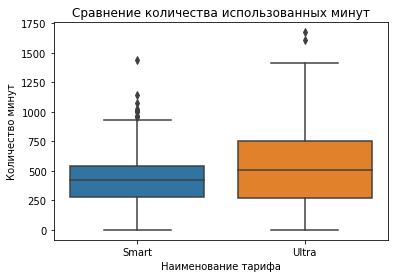

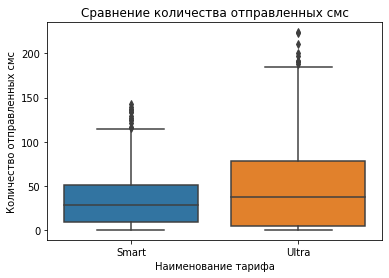

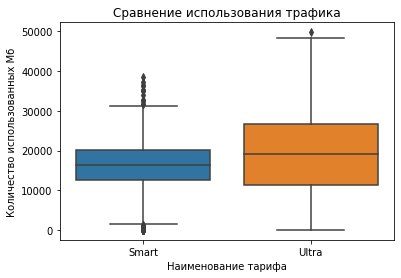

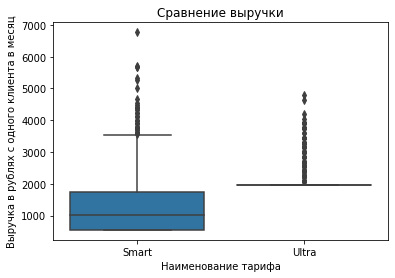

In [59]:
import seaborn as sns
df_smart=df_smart.assign(Tariff="Smart")
df_ultra=df_ultra.assign(Tariff="Ultra")
cdf = pd.concat([df_smart, df_ultra])


dict_label= {'total_dur':{'title':'Сравнение количества использованных минут','ylabel':'Количество минут'},
            'sms': {'title':'Сравнение количества отправленных смс','ylabel':'Количество отправленных смс'},
             'mb_used':{'title':'Сравнение использования трафика','ylabel':'Количество использованных Мб'},
            'revenue':{'title':'Сравнение выручки','ylabel':'Выручка в рублях с одного клиента в месяц'}}

for key, value in dict_label.items():
    ax = sns.boxplot(y=key, x='Tariff', data=cdf)
    plt.xlabel('Наименование тарифа')
    plt.ylabel(value['ylabel'])
    plt.title(value['title'])
    plt.show()



На диаграммах рассеяния видно, что разброс значений величин использования минут, мегабайт и смс у пользователей тарифа "ультра" выше, чем у клиентов "смарт". Данный факт подтверждался дисперсией и стандартным отклонением в ранее представленной таблице. Также стоит отметить, что в выборке по тарифу "смарт" присутствует больше выбросов. 

*Рассмотрим также распределения показателей использования минут, интернет-трафика и смс.*

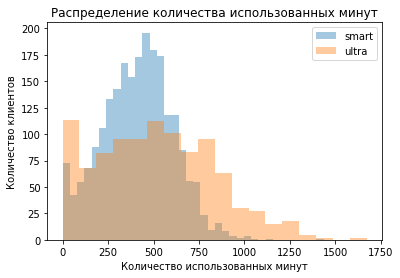

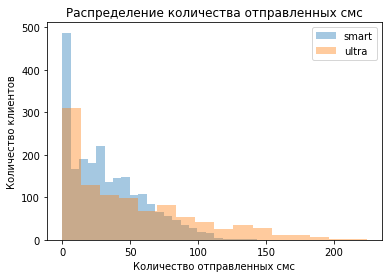

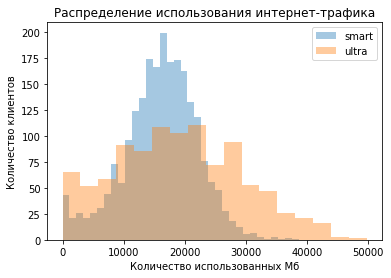

In [60]:
dict_label= {'total_dur':{'title':'Распределение количества использованных минут','xlabel':'Количество использованных минут'},
            'sms': {'title':'Распределение количества отправленных смс','xlabel':'Количество отправленных смс'},
             'mb_used':{'title':'Распределение использования интернет-трафика','xlabel':'Количество использованных Мб'}}

for key, value in dict_label.items():
    sns.distplot(df_smart[key],kde=False, label="smart")
    sns.distplot(df_ultra[key], kde=False, label="ultra")
    plt.legend()
    plt.xlabel(value['xlabel'])
    plt.title(value['title'])
    plt.ylabel('Количество клиентов')
    plt.show()
   

Из сравнительных графиков распределений мы видим, что в выборке по тарифу "смарт" по всем видам услуг имеется ярко выраженная мода в сравнении с выборкой по тарифу "ультра". Также можно вновь подтвердить вывод о том, что разброс значений в выборке "ультра" по смс, минутам и мегабайтам выше. Данный факт можно объяснить различными предположениями:

* во-первых, размер выборки по тарифу смарт меньше в 2,3 раза, а значит в ней может быть большее отконение от истинной средней величины
* во-вторых, около 85% пользователей тарифа смарт не выходят за установленные лимиты, а зачастую у них остаются еще и неизрасходованные минуты, смс и мегабайты. Иными словами, в рамках тарифа "ультра" пользователи имеют бОльшую свободу действий, в то время как клиенты "смарт" наоборот склонны исчерпывать свои лимиты и доплачивать сверх ежемесячной платы.

Годовые тенденции в потреблении услуг и платах</font>

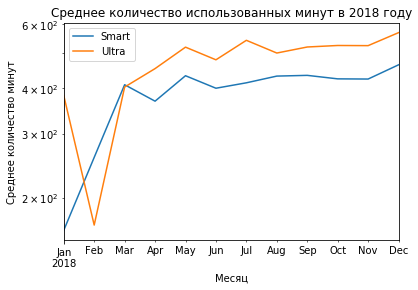

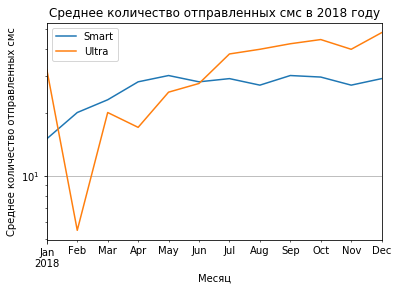

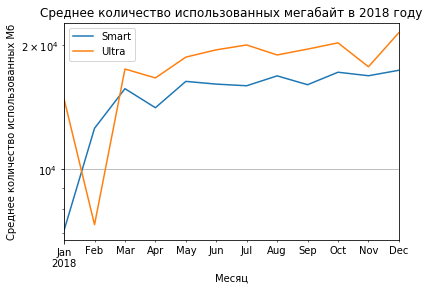

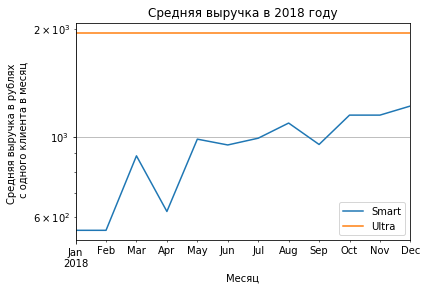

In [61]:
dict_l= {'total_dur':{'title':'Среднее количество использованных минут в 2018 году','ylabel':'Среднее количество минут'},
            'sms': {'title':'Среднее количество отправленных смс в 2018 году','ylabel':'Среднее количество отправленных смс'},
             'mb_used':{'title':'Среднее количество использованных мегабайт в 2018 году','ylabel':'Среднее количество использованных Мб'},
            'revenue':{'title':'Средняя выручка в 2018 году','ylabel':'Средняя выручка в рублях \n с одного клиента в месяц'}}

for key, value in dict_l.items():
    df_sm=df_smart.pivot_table(index='month', values=key, aggfunc=['median'])
    df_ul=df_ultra.pivot_table(index='month', values=key, aggfunc=['median'])
    ak=df_sm.merge(df_ul, on='month')
    g=ak.plot(logy=True,grid=True)
    plt.xlabel('Месяц')
    plt.ylabel(value['ylabel'])
    plt.title(value['title'])
    plt.legend(['Smart', 'Ultra'])
    plt.show()


In [62]:
df_ultra.pivot_table(index='month', values='user_id', aggfunc=['count'])

,count
,user_id
month,
2018-01-01,9
2018-02-01,24
2018-03-01,37
2018-04-01,55
2018-05-01,67
2018-06-01,84
2018-07-01,91
2018-08-01,107


На графиках представленных выше можно заметить, что в течние 2018 года наблюдается тенденция роста использования всех видов услуг пакета у пользователей обоих тарифов, не считая резкого снижения у пользователей тарифа ультра в феврале. Снижение в феврале количества использованных минут, Мб и смс у тарифа ультра может объясняться, тем, что данные за январь представлены всего по 9 клиентам, и они не были достаточно репрезентативны, в феврале количество клиентов выросло уже до 24, соответсвенно и средний показатель мог значительно измениться. Также можно предположить, что данное снижение было связано с перебоями поставки услуг у оператора, если таковые были зафиксированы в данный период.

Что касается выручки, то клиенты тарифы ультра стабильно приносят компании значительно больше денег, в то время как выручка с клиентов тарифа смарт имеет ряд значительных колебаний в начале года и в конце имеет тенденцию роста, однако все еще в значительной мере не достигая уровня вырчуки с тарифа ультра.

Cколько в сумме принес каждый тариф

In [63]:
df.pivot_table(index='tariff', values='revenue', aggfunc=['count','sum'])

,count,sum
,revenue,revenue
tariff,,
smart,2253,2898951
ultra,1006,2080950


Суммарно за год тариф смарт принес примерно на 28% выручки больше, однако необходимо отметить что и платежей по тарифу смарт совершалось примерно на 55% больше. 

### Вывод

В результате анализа использования пакета услуг различных тарифов можно сделать следующие выводы о клиентах:

* около 85% клиентов тарифа смарт выходит за лимиты пакета услуг и платит сверх ежемесячной платы, в то время как только 15% абонентов "ультра" не укладываются в ограничения тарифа;
* разброс значений в выборке тарифа "ультра" по смс, минутам и мегабайтам выше и поведение клиентов данного тарифа сложнее прогнозировать;
* средняя вырчка с клиента тарифа "смарт" составляет 1013 рублей в месяц, а с пользователя тарифа "ультра"-1950 рублей в месяц;
* у клиентов обоих тарифов наблюдается рост спроса на использование предоставляемых услуг: звонки, смс и интернет-трафик;
* клиенты тарифы ультра стабильно приносят компании значительно больше денег, в то время как выручка с клиентов тарифа смарт имеет ряд значительных колебаний в течение года и не достигает уровня выручки с тарифа ультра;
* в 2018 году суммарная вырчука с тарифа смарт выше на 28%, при этом платежей по тарифу смарт совершалось примерно на 55% больше. Учитывая, что средняя выручка с клиента тарифа ультра выше,  потенциальный рост клиентов ультра мог бы принести компании бОльшую выручку чем с клиентов тарифа смарт. Однако для подтверждения данного вывода нам необходимо проверить гипотезу о разнице средних выручек между тарифами.



<a id="step5"></a> 
## Проверка гипотез

* ***средняя выручка пользователей тарифов «Ультра» и «Смарт» различается***

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind. Сформулируем нулевую и альтернативную гипотезы:

* ***H0***: средняя выручка пользователей тарифов «Ультра» **равна** средней выручке пользователей тарифов «Смарт»
* ***H1***: средняя выручка пользователей тарифов «Ультра» **не равна** средней выручке пользователей тарифов «Смарт»

Проверим нулевую гипотезу на пятипроцентном уровне значимости.

In [64]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(df_smart['revenue'],df_ultra['revenue'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.980167481905681e-164
Отвергаем нулевую гипотезу


На пятипроцентном уровне значимости мы можем отвергнуть нулевую гипотезу о том, что средняя вырчука с пользователей разных тарифов равна. А значит, средняя выручка с клиентов разных тарифов различается.

* ***средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов***

In [65]:
#создадим выборки для проверки гипотезы
df_other=df.query('city!="Москва"')
df_moscow=df.query('city == "Москва"')

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind. Сформулируем нулевую и альтернативную гипотезы:

* ***H0***: средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов
* ***H1***: средняя выручка пользователей из Москвы **не равна** средней выручке пользователей из других регионов

Проверим нулевую гипотезу на пятипроцентном уровне значимости.

In [66]:
alpha = 0.05
results = st.ttest_ind(df_other['revenue'],df_moscow['revenue'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4319222953257701
Не получилось отвергнуть нулевую гипотезу


На пятипроцентном уровне значимости у нас нет оснований отвергнуть нулевую гипотезу о том, что средняя выручка с клиентов из москвы равна средней выручке с клиентов из других регионов.

### Вывод

На даном этапе мы выяснили, что средняя вырчка с клиентов действительно отличается в зависмости от используемых ими тарифов, а также не подтвердили гипотезу о том, что средняя вырчука зависит от региона клиента.

<a id="step6"></a> 
## Общий вывод

В результате проведенного анализа базы данных клиентов федерального оператора сотовой связи "Мегалайн" мы можем сделать следующие выводы:

* около 85% клиентов тарифа "смарт" выходит за лимиты пакета услуг и платит сверх ежемесячной платы, в то время как только 15% абонентов "ультра" не укладываются в ограничения тарифа;
* разброс значений в выборке тарифа "ультра" по смс, минутам и мегабайтам выше, клиенты данного тарифа имеют бОльшую свободу действий в рамках установленных лимитов и их поведение сложнее прогнозировать;
* у клиентов обоих тарифов наблюдается рост спроса на использование предоставляемых услуг: звонки, смс и интернет-трафик;
* гипотеза о том, что средняя вырчука с клиентов из Москвы отличается от средней выручки с клиентов из других регионов не подтвердилась.

Учитывая ряд следующих факторов:

* на пятипроцентном уровне значимости мы можем говорить о том, что средняя выручка с клиента зависит от используемого им тарифа: средняя выручка с клиента тарифа "смарт" составляет 1013 рублей в месяц, а с пользователя тарифа "ультра"-1950 рублей в месяц;
* клиенты тарифы ультра стабильно приносят компании значительно больше денег, в то время как средняя выручка с клиентов тарифа смарт имеет ряд значительных колебаний в течение года и не достигает уровня средней выручки с тарифа ультра;
* несмотря на то, что в 2018 году суммарная вырчука с тарифа смарт выше на 28%, при этом платежей по тарифу смарт совершалось примерно на 55% больше;

мы можем говорить о том, что потенциальный рост клиентов с тарифом "ультра" может принести бОльшую выручку компании, следовательно, в рекламных расходах стоит отдавать больше предпочтения продвижению тарифа "ультра". Также зная, что клиенты тарифы смарт склонны регулярно выходить за лимиты ограничений своего тарифа, можно предлагать им сменить тариф на "ультра", делая акцент на то, что в рамках данного тарифного плана у них будет больше свободы действий и не придется совершать доплаты сверх ежемесячного платежа.


